In [1]:
%load_ext autoreload
%autoreload 2

#import sys
#sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_Vps4/Data/'
#plotsdir = '/Users/billie/Documents/PHD/ESCRT_Proj1/Curvy_model/GitPlots/MechanoChemDataAndPlotting/Fig_Vps4/SlideFigs/'

## Energy Packet and rigidity

In [2]:
def DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,Kd1s,Kd2s):
   #Defining our DoS parameter
    thing1 = np.add(np.divide(P1t0,Maxof0), np.divide(P2t0,Maxof0))
    thing2 = np.add(np.divide(P0t1,Maxof1),np.divide(P2t1,Maxof1))
    firstT = np.add(thing1,thing2)
    secondT = 2*np.add(np.divide(LastProb0,Maxof0),np.divide(LastProb1,Maxof1))
    thing4 = np.add(np.divide(Maxof0,Maxof2),np.divide(Maxof1,Maxof2))
    thirdT = (1/2)*abs(np.add(2,-thing4))
    fourthT = np.add(1,-np.divide(LastProb2,Maxof2))
    thing5add4 = np.add(fourthT,thirdT)
    lastTs = np.add(thing5add4,secondT)
    DoS_ = (1/10)*(np.add(firstT,lastTs))
    
    DoS = np.divide(1,DoS_)
    DoS_arr= DoS.values.reshape(Kd1s,Kd2s)
    
    return DoS_arr/3.5

#loc = datadir +'EvRig_CharCrvCombo'
loc = datadir +'E_0vCharCrv'
n1 = 120
k1= 4
k2= 30
Maxof0_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [0])#.lstrip('(')#.rstrip(']')
Maxof0__ = np.zeros(n1)
for i in range(n1):
    Maxof0__[i] = Maxof0_[0][i].lstrip('(')
Maxof0 = Maxof0__
Maxof1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [1])
Maxof2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [2])
LastProb0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [3])
LastProb1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [4])
LastProb2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [5])
P1t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [6])
P2t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [7])
P0t1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [8])
P2t1_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [9])
P2t1__ = np.zeros(n1)
for j in range(n1):
    P2t1__[j] = P2t1_[9][j].rstrip(') ')
P2t1 = P2t1__.reshape(n1,1)
Maxof0 = Maxof0__.reshape(n1,1)

DoS = DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,k1,k2)

Arr=DoS

ad12 = np.add(LastProb1,LastProb2)
adall = np.add(ad12,LastProb0)
Indent2 =np.multiply(LastProb2,2.0) 
p_ = np.add(LastProb1,Indent2)
p = np.divide(p_,adall)
P_Arr= p.values.reshape(k1,k2)

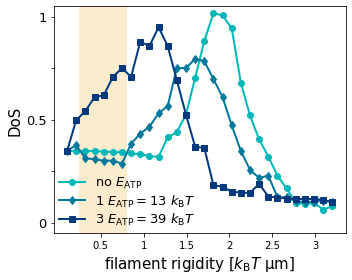

In [4]:
fig,ax = plt.subplots(figsize = (5,4))
p0=Arr[3,:]
X0 = np.arange(0.05,1.51, 0.05)*(1920/0.9)
p2=Arr[0,:]
Ev_2 = 13
Ev_3 = 26
Ev_4 = 39
p3=Arr[1,:]
p4=Arr[2,:]
colors=['teal','palevioletred','slategrey']
colors=['#00b7ba', '#00789c','#00397e']
ax.plot(X0, p0, 'o-',color = colors[0], label = "no $E_\mathrm{ATP}$", linewidth = 2)
ax.plot(X0, p2, 'd-',color = colors[1], label = "$1\ E_\mathrm{ATP} = "+str(Ev_2)+ " \ k_\mathrm{B}T$", linewidth = 2)
#ax.plot(X0, p3, 's-',color = colors[2], label = "$2E_\mathrm{ATP} = "+str(Ev_3)+ " \ k_\mathrm{B}T$", linewidth = 2)
ax.plot(X0, p4, 's-',color = colors[2], label = "$3\ E_\mathrm{ATP} = "+str(Ev_4)+ " \ k_\mathrm{B}T$", linewidth = 2)
plt.legend(loc=[0.,0.0],frameon=False,fontsize=13,labelspacing=0.2)

plt.xlabel("filament rigidity [$k_\mathrm{B}T\ \mathrm{\mu m}$]", fontsize = 15) 
plt.ylabel("DoS", fontsize = 15) 
plt.xticks([500,1000,1500,2000,2500,3000],["0.5","1","1.5","2", "2.5" , "3"])

plt.yticks([0,0.25,0.50,0.75,1],["0","0.25","0.5","0.75","1"],fontsize=13)
n = 2  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]
shadecolors=['gold','darkorange']
shadecolors=['#efa00b','#cf8a0a']
ax.fill_betweenx([-0.1,1.1],[250,250],[800,800],color=shadecolors[0], alpha=0.2,linewidth=0)




#ax.fill_betweenx([-0.1,1.1],[250,250],[800,800],color=shadecolors[0], alpha=0.2,linewidth=0)
plt.ylim(-0.05,1.05)
#plt.annotate("estimated\n  rigidity",(310,0.02), color=shadecolors[1], rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


fname  = 'DoSVps4.pdf'
fig.savefig('Plots/'+fname)

## Membrane Indentation

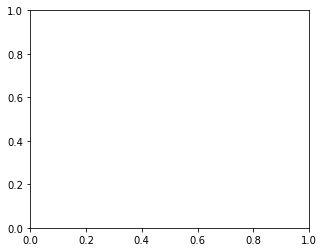

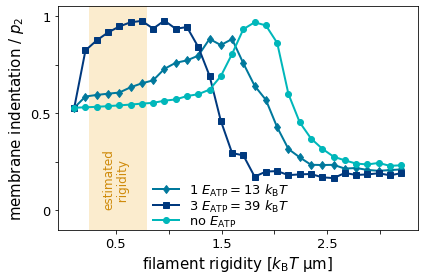

In [8]:
fig,ax = plt.subplots(figsize = (5,4)) ##PAPER
fig,ax = plt.subplots(figsize = (6,4)) ##THESIS
p0=P_Arr[3,:]/2.0
X0 = np.arange(0.05,1.51, 0.05)*(1920/0.9)
p2=P_Arr[0,:]/2.0
Ev_2 = 13
Ev_3 = 26
Ev_4 = 39
p3=P_Arr[1,:]/2.0
p4=P_Arr[2,:]/2.0
colors=['teal','palevioletred','slategrey']
colors=['#00b7ba', '#00789c','#00397e']
ax.plot(X0, p2, 'd-',color = colors[1], label = "$1\ E_\mathrm{ATP} = "+str(Ev_2)+ " \ k_\mathrm{B}T$", linewidth = 2)
#ax.plot(X0, p3, 's-',color = colors[2], label = "$2E_\mathrm{ATP} = "+str(Ev_3)+ " \ k_\mathrm{B}T$", linewidth = 2)
ax.plot(X0, p4, 's-',color = colors[2], label = "$3\ E_\mathrm{ATP} = "+str(Ev_4)+ " \ k_\mathrm{B}T$", linewidth = 2)
ax.plot(X0,p0, 'o-',color = colors[0], label = "no $E_\mathrm{ATP}$", linewidth = 2)

plt.legend(loc=[0.25,-0.02],frameon=False,fontsize=13,labelspacing=0.0) ##PAPER
#plt.legend(loc=[0.75,0.8],frameon=False,fontsize=13,labelspacing=0.0) ##THESIS

plt.xlabel("filament rigidity [$k_\mathrm{B}T\ \mathrm{\mu m}$]", fontsize = 15) 
plt.ylabel("membrane indentation / $p_{2}$", fontsize = 15) 
plt.xticks([500,1000,1500,2000,2500,3000],["0.5","1","1.5","2", "2.5" , "3"],fontsize=13)

plt.yticks([0,0.25,0.50,0.75,1],["0","0.25","0.5","0.75","1"],fontsize=13)
n = 2  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]


shadecolors=['gold','darkorange']
shadecolors=['#efa00b','#cf8a0a']
#shadecolors=['hotpink','deeppink']

ax.fill_betweenx([-0.1,1.1],[250,250],[800,800],color=shadecolors[0], alpha=0.2,linewidth=0)
plt.ylim(-0.1,1.05)
plt.annotate("estimated\n  rigidity",(370,0.02), color=shadecolors[1], rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


fname  = 'Vps4.pdf'
fig.savefig('Plots/'+fname)
#fig.savefig('SlideFigs/'+fname)